<a href="https://colab.research.google.com/github/smraytech/test/blob/main/Advertising_Spend_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Full Project: Advertising Spend vs Sales (Step-by-Step)

🧪 1️⃣ Load & Clean Data

📦 Step 1: Import Libraries

In [53]:
# Core data and modeling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Display plots inline in Google Colab
%matplotlib inline

📂 Step 2: Load the CSV File

In [54]:
# Load the dataset
df = pd.read_csv('/content/Advertising Budget and Sales.csv')

# Preview the first few rows
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


📊 Step 3: EDA – Exploratory Data Analysis

In [55]:
# Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [56]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64


In [57]:
# Statistical summary
print(df.describe())

       Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  \
count  200.000000        200.000000           200.000000   
mean   100.500000        147.042500            23.264000   
std     57.879185         85.854236            14.846809   
min      1.000000          0.700000             0.000000   
25%     50.750000         74.375000             9.975000   
50%    100.500000        149.750000            22.900000   
75%    150.250000        218.825000            36.525000   
max    200.000000        296.400000            49.600000   

       Newspaper Ad Budget ($)   Sales ($)  
count               200.000000  200.000000  
mean                 30.554000   14.022500  
std                  21.778621    5.217457  
min                   0.300000    1.600000  
25%                  12.750000   10.375000  
50%                  25.750000   12.900000  
75%                  45.100000   17.400000  
max                 114.000000   27.000000  


Step 4: Clean the Column Names

In [58]:
df.columns

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

In [59]:
# Strip any whitespace in column names
df.columns = df.columns.str.strip()

# Display cleaned column names
print("Cleaned Column Names:", df.columns.tolist())

Cleaned Column Names: ['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)', 'Sales ($)']


In [60]:
for col in df.columns:
    print(repr(col))  # Show any hidden characters

'Unnamed: 0'
'TV Ad Budget ($)'
'Radio Ad Budget ($)'
'Newspaper Ad Budget ($)'
'Sales ($)'


In [61]:
# Statistical summary
print(df.describe())

       Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  \
count  200.000000        200.000000           200.000000   
mean   100.500000        147.042500            23.264000   
std     57.879185         85.854236            14.846809   
min      1.000000          0.700000             0.000000   
25%     50.750000         74.375000             9.975000   
50%    100.500000        149.750000            22.900000   
75%    150.250000        218.825000            36.525000   
max    200.000000        296.400000            49.600000   

       Newspaper Ad Budget ($)   Sales ($)  
count               200.000000  200.000000  
mean                 30.554000   14.022500  
std                  21.778621    5.217457  
min                   0.300000    1.600000  
25%                  12.750000   10.375000  
50%                  25.750000   12.900000  
75%                  45.100000   17.400000  
max                 114.000000   27.000000  


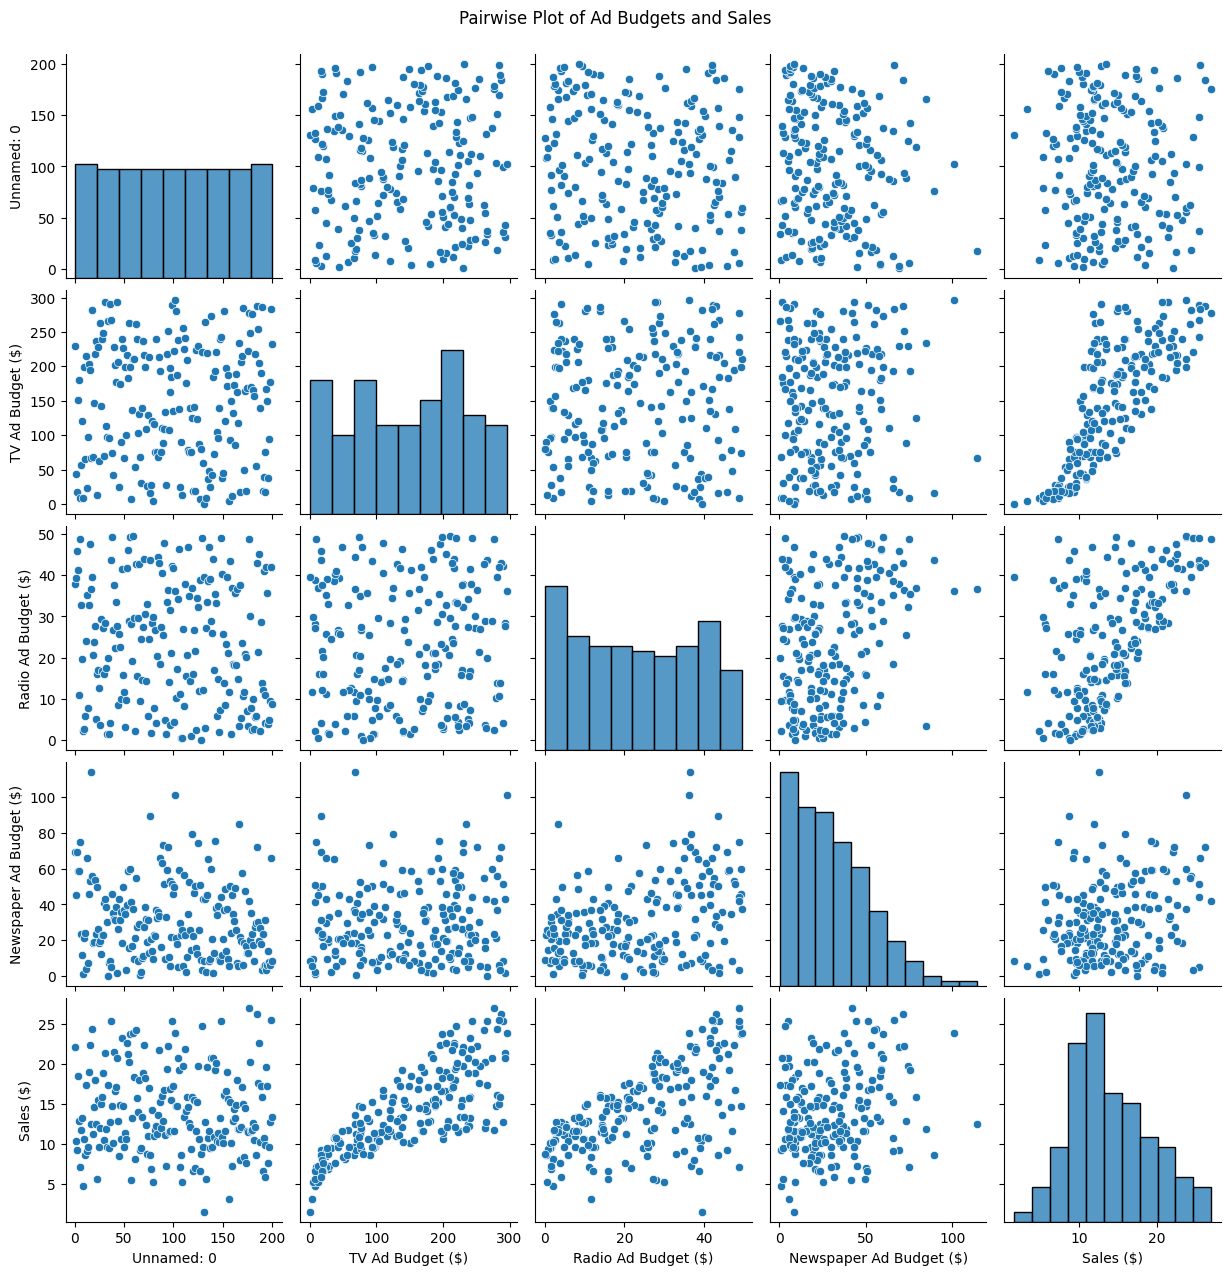

In [62]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.suptitle("Pairwise Plot of Ad Budgets and Sales", y=1.02)
plt.show()

📉 Step 5: Correlation Analysis

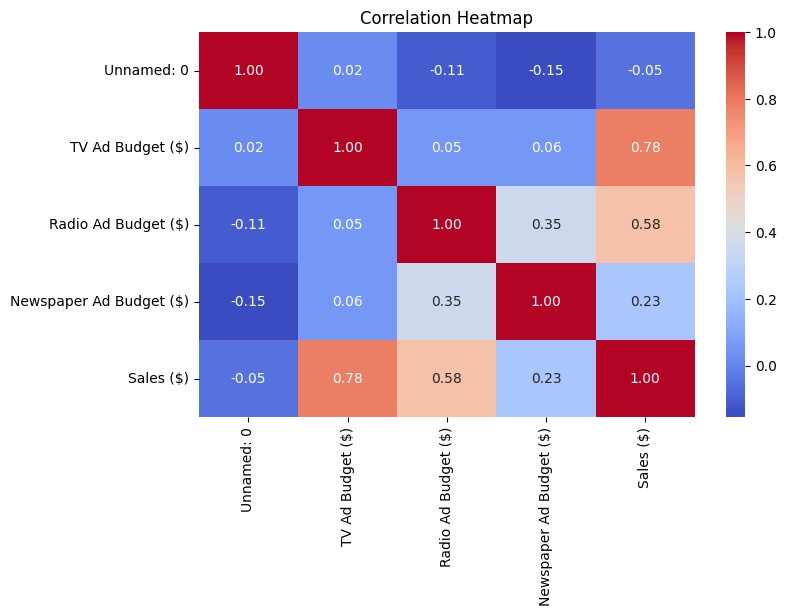

In [63]:
# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

🏗️ Step 6: Feature and Target Preparation

In [64]:
# Features: all columns except 'Sales'
features = df.columns.difference(['Sales ($)'])
X = df[features]

# Target: Sales
y = df['Sales ($)']

✂️ Step 7: Train-Test Split

In [65]:
# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

🤖 Step 8: Train Linear Regression Model

In [66]:
# Initialize and fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

🔮 Step 9: Make Predictions

In [67]:
# Predict sales on test set
y_pred = model.predict(X_test)

📏 Step 10: Model Evaluation

In [68]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Squared Error: {mse:.2f}")
print(f"📈 R² Score: {r2:.2%}")

📉 Mean Squared Error: 3.20
📈 R² Score: 89.86%


📈 Step 11: Plot Actual vs Predicted Sales

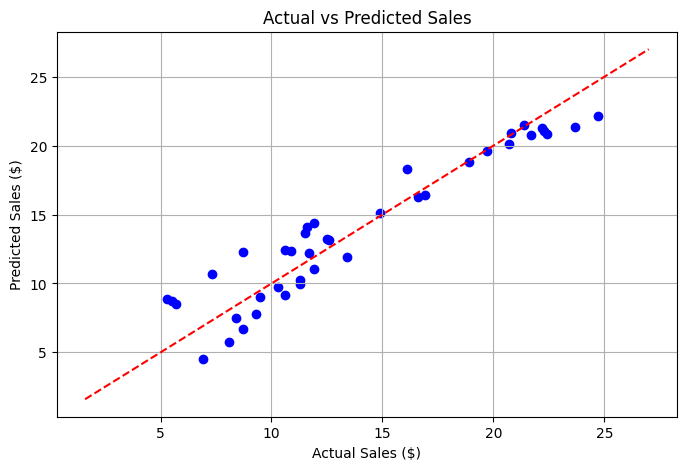

In [69]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales ($)")
plt.ylabel("Predicted Sales ($)")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

📊 Step 12: Feature Importance (Coefficient Analysis)

In [70]:
# Extract feature importances
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coefficients)

                   Feature  Coefficient
1      Radio Ad Budget ($)     0.189251
2         TV Ad Budget ($)     0.044718
0  Newspaper Ad Budget ($)     0.003046
3               Unnamed: 0     0.000644


📌 Step 13: Visualize Feature Impact

/tmp/ipython-input-71-1282782851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='coolwarm')


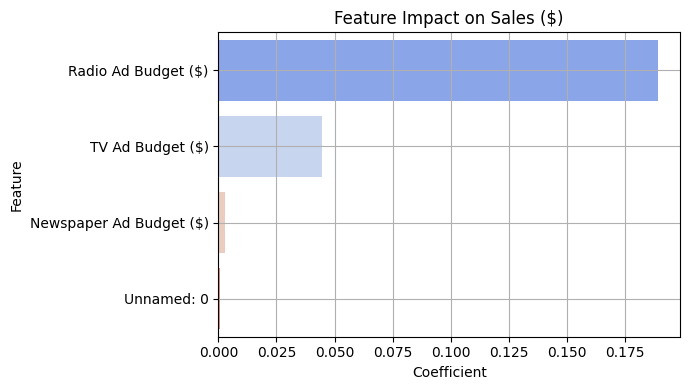

In [71]:
plt.figure(figsize=(7, 4))
sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Feature Impact on Sales ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

🧾 Step 14: Executive Summary for Stakeholders

In [72]:
print("\n📋 Business Summary for Stakeholders:")
print(f"""
✔️ The model explains {r2:.2%} of the variance in sales using advertising budgets.
✔️ Most influential feature: '{coefficients.iloc[0]['Feature']}'.
✔️ Suggested action: Increase investment in high-impact channels for better ROI.
✔️ Consider adding digital ads, seasonal data, and region-specific budgets in future models.
✔️ Results are actionable and can guide budget reallocation strategies.
""")


📋 Business Summary for Stakeholders:

✔️ The model explains 89.86% of the variance in sales using advertising budgets.
✔️ Most influential feature: 'Radio Ad Budget ($)'.
✔️ Suggested action: Increase investment in high-impact channels for better ROI.
✔️ Consider adding digital ads, seasonal data, and region-specific budgets in future models.
✔️ Results are actionable and can guide budget reallocation strategies.





*   ✅ **Project Complete! This project includes:**
*   Clean data
*   Linear model
*   Coefficients and visualizations
*   Executive summary for presentations





🔧 Step 1: Install Streamlit (on local system)

In [73]:
!pip install streamlit

📄 Step 2: Streamlit Dashboard Code (app.py)
Save the following code into a file called app.py:

In [74]:
# app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

st.set_page_config(page_title="Ad Budget Dashboard", layout="wide")

2025-07-14 17:22:16.218 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [75]:
# Title
st.title("📊 Advertising Budget & Sales Dashboard")
st.markdown("Upload your data to visualize and predict sales based on ad budget.")

2025-07-14 17:22:16.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 17:22:16.230 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 17:22:16.231 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 17:22:16.232 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 17:22:16.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 17:22:16.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [77]:
# File Upload
uploaded_file = st.file_uploader("Upload CSV file", type="csv")

if uploaded_file:
    df = pd.read_csv(uploaded_file)

    st.subheader("1️⃣ Data Preview")
    st.dataframe(df.head())

    st.subheader("2️⃣ Exploratory Analysis")

    with st.expander("Show Summary Stats"):
        st.write(df.describe())

    if 'Sales ($)' not in df.columns:
        st.error("The dataset must have a 'Sales ($)' column for predictions.")
    else:
        # Features and target
        features = df.columns.difference(['Sales ($)'])
        X = df[features]
        y = df['Sales ($)']

        # Train/test split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.2,
                                                            random_state=42)

        # Train model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict and score
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        st.subheader("3️⃣ Model Performance")
        st.write(f"**R² Score:** {r2:.3f}")
        st.write(f"**Mean Squared Error (MSE):** {mse:.2f}")

        st.subheader("4️⃣ Feature Importance")
        coeffs = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
        st.dataframe(coeffs.sort_values(by="Coefficient", ascending=False))

        st.subheader("5️⃣ Visualization")

        for col in features:
            fig, ax = plt.subplots()
            sns.scatterplot(data=df, x=col, y='Sales ($)', ax=ax)
            plt.title(f"{col} vs Sales")
            st.pyplot(fig)

        st.subheader("6️⃣ Predict on New Data")
        with st.expander("Make Prediction"):
            inputs = {}
            for col in features:
                inputs[col] = st.number_input(f"Enter {col}", min_value=0.0)

            if st.button("Predict Sales"):
                input_df = pd.DataFrame([inputs])
                prediction = model.predict(input_df)[0]
                st.success(f"📈 Predicted Sales: ${prediction:.2f}")

2025-07-14 17:23:06.883 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 17:23:06.884 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 17:23:06.886 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 17:23:06.888 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 17:23:06.889 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 17:23:06.890 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
